# Gradient Boosting算法

Boosting 算法属于机器学习中的 Ensemble 类算法。它通过一群 Weak Learner，尝试在每一次错误中学习，来创建一个 Strong Learne r以达到最优的预测效果，核心思想就是”知能改的三个臭皮匠胜过一个诸葛亮“。

Weak Learner 指的是”比乱猜好一点“的模型，这类模型复杂度低、训练成本低、不容易过拟合(Overfitting)，例如深度只有1的 Decision Tree，可以想见深度只有1的决策树并不好用，但它满足 weak learner 的性能，可以快速训练，而且比随机猜测的效果要好一些。

如果使用这类的 Weak Learner 作为 Boosting 的 Base Learner，除了能够快速的训练出许多模型外，Weak Learner 的低复杂度也为我们带來一个好性质：最终组合出的 Strong Learner 能对 Overfitting 有具有良好的抵抗性。
## Boosting算法原理

Boosting算法实际上比较简单，它是一个循环过程。首先是用 Weak Learner 生成模型，然后再用 Weak Learner 去匹配前一次预测输出与实际值的残差，不断往复，最后的预测模型是所有这些 Weak Learner 预测模型的加和。

第一次模型$F(x)$的预测输出为$ y\_pred $, 第二次则使用$x$和$y-y\_pred$去训练模型，模型为$h(x)$，实际预测的是第一次模型输出与实际值的残差，而这时整个预测模型为$F(x) + h(x)$

Boosting 算法一般都能达到较好的效果，为什么 Boosting 算法总是要好一些呢？可以从原理上说明，损失函数在使用MSE时我们表示为
$$ J(y, F(x)) = \frac{1}{2}(y - F(x))^2 $$

这里面$F(x)$是个变量，为了使损失变小，需要沿着梯度方向去更新$F(x)$

$$ \frac{\partial J}{\partial{F}} = -(y - F) $$

也就是在说使用MSE Loss的情况下，残差(Residual)下是$Loss$对$F$的Gradient取负号。而 $ H(x) = F(x) + h(x) $视为对 $F(x)$更新

$$ h(x) = -\frac{\partial J}{\partial{F}} = y -F $$

所以通过匹配残差实际就是在沿着梯度方向来降低Loss函数，这就是解释了Boosting算法为什么能升算法的预测准确度。



## Boosting算法实例

我们使用一叉决策树这个weak learner，然后不断去匹配残差，到30次之后，整个模型已经变成了一个Strong Learner，可以很好的匹配训练数据了，参见图可以观察到Gradient Boosting算法的演化过程。

In [1]:
%matplotlib inline

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from IPython.display import display
from sklearn import metrics
from sklearn import tree
import warnings

warnings.filterwarnings("ignore")

In [2]:
x = np.arange(0,50)
x = pd.DataFrame({'x':x})

y1 = np.random.uniform(10,15,10)
y2 = np.random.uniform(20,25,10)
y3 = np.random.uniform(0,5,10)
y4 = np.random.uniform(30,35,10)
y5 = np.random.uniform(12,17,10)

y = np.concatenate((y1,y2,y3,y4,y5))
y = pd.DataFrame({'y':y})

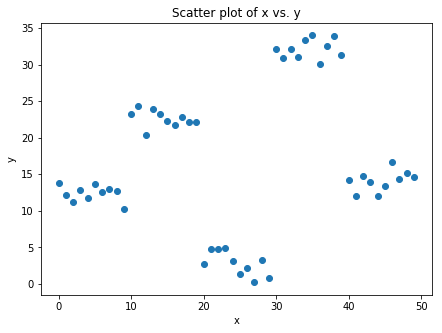

In [3]:
plt.figure(figsize=(7,5))
plt.plot(x,y, 'o')
plt.title("Scatter plot of x vs. y")
plt.xlabel("x")
plt.ylabel("y")
plt.show()

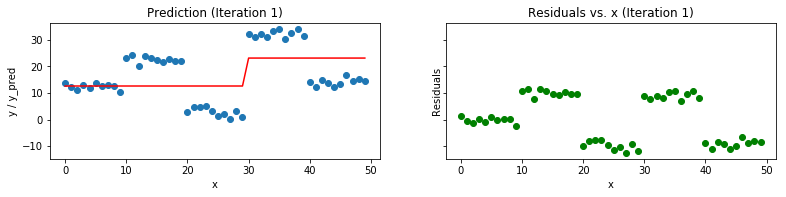

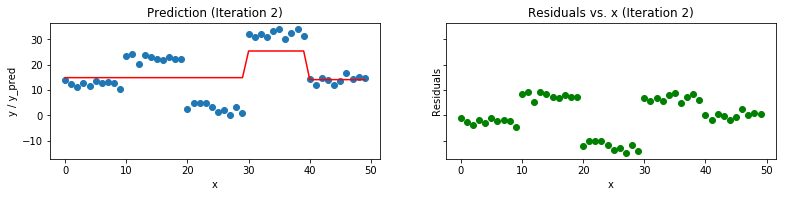

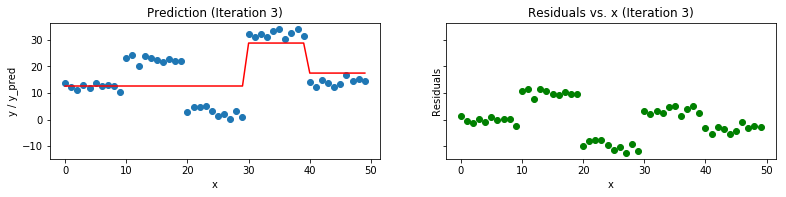

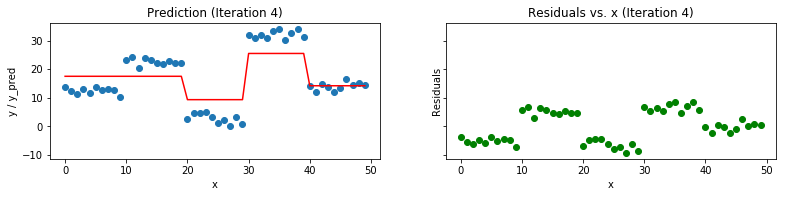

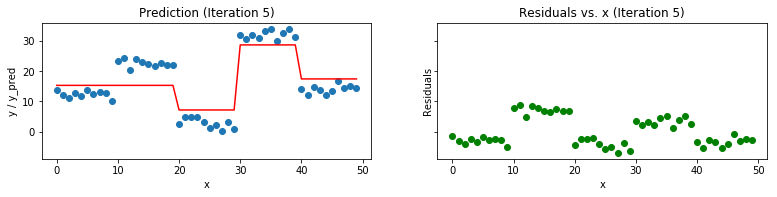

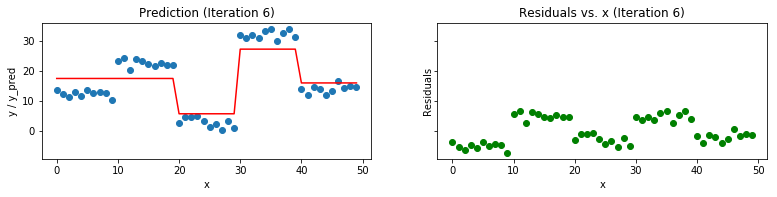

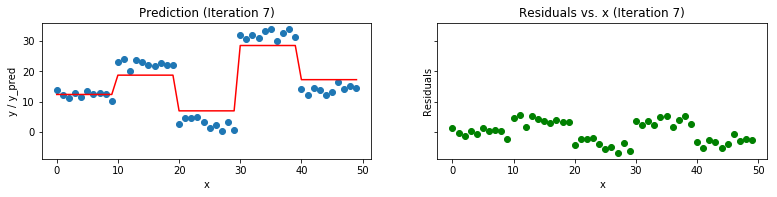

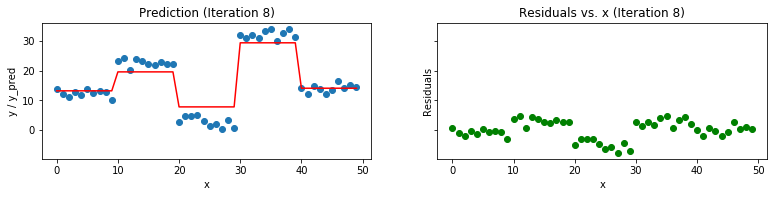

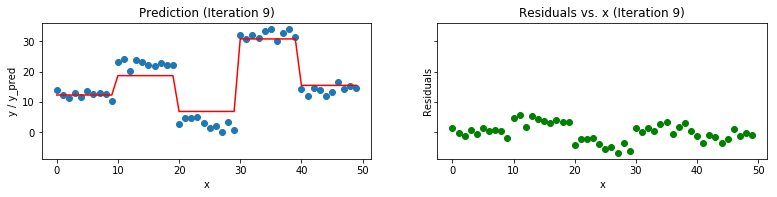

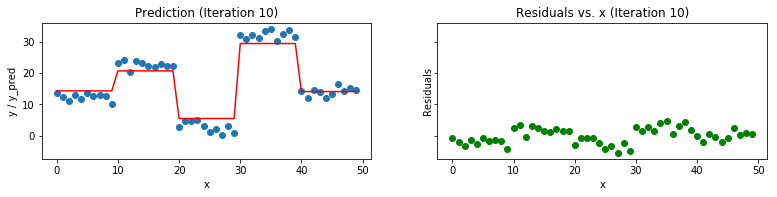

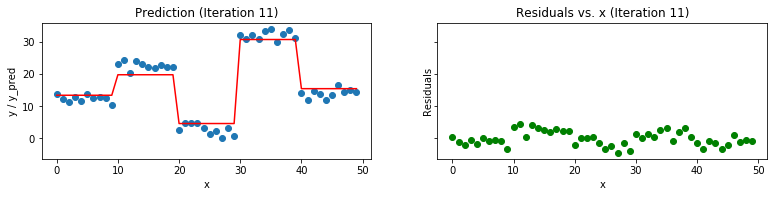

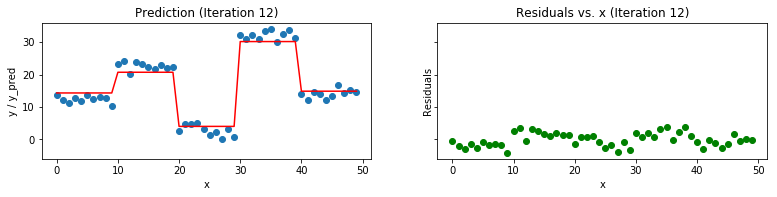

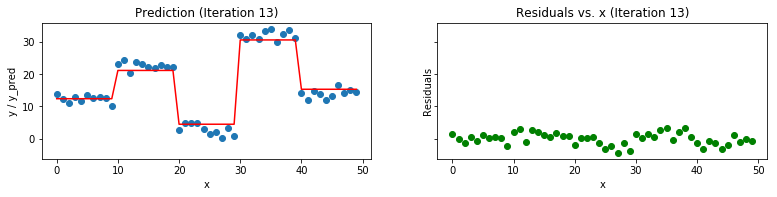

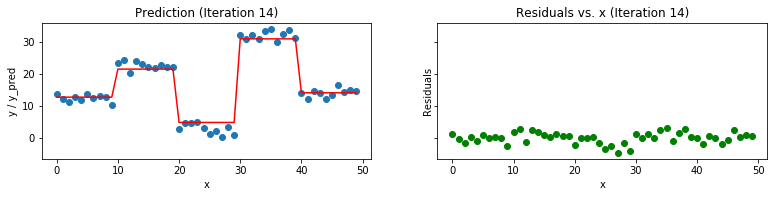

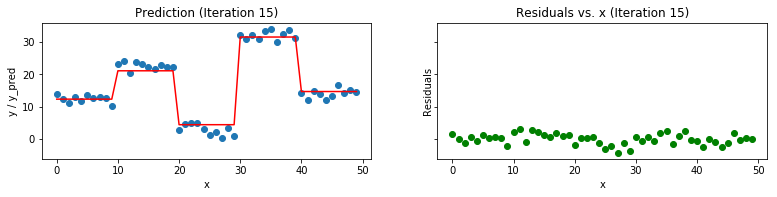

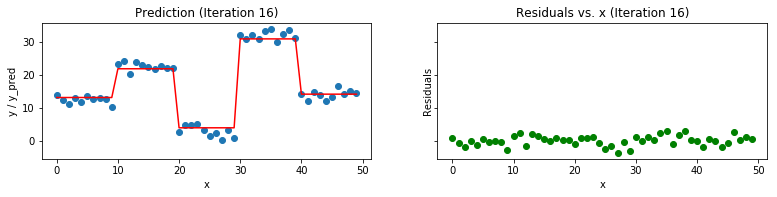

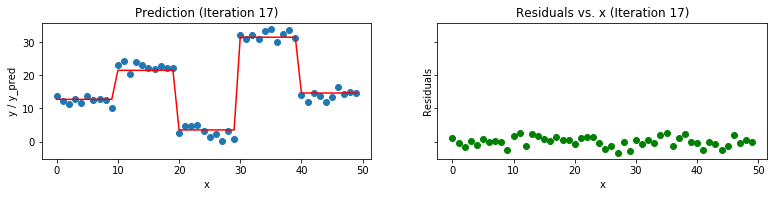

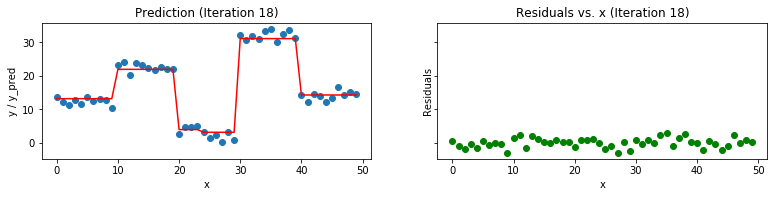

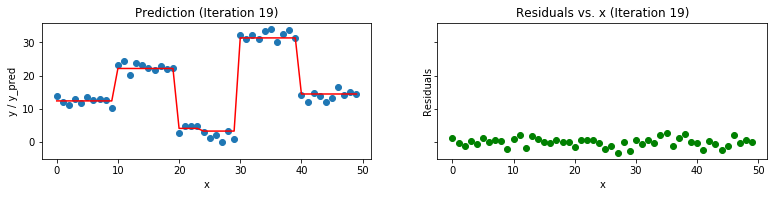

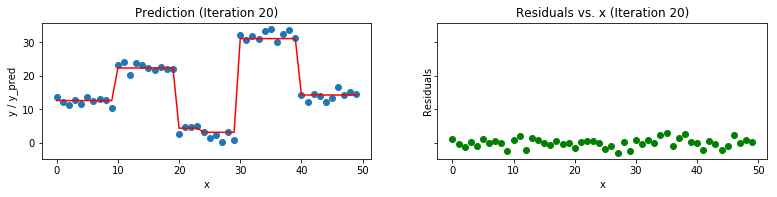

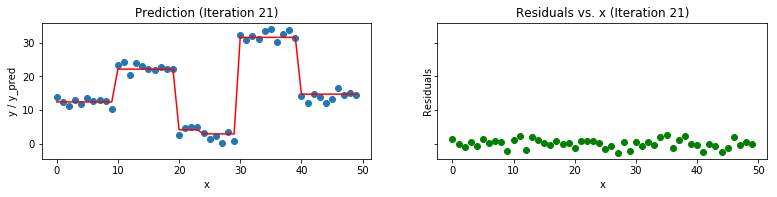

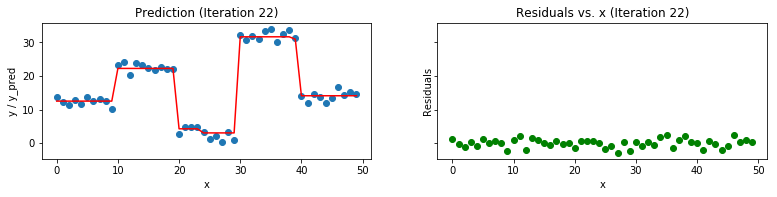

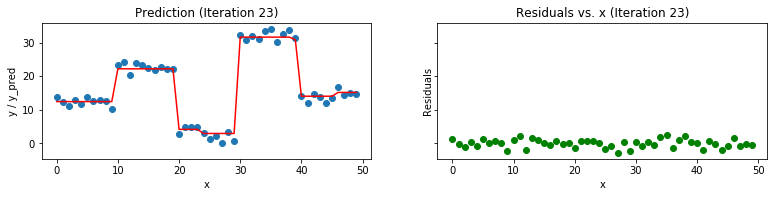

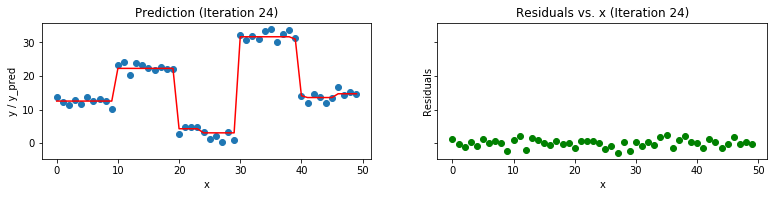

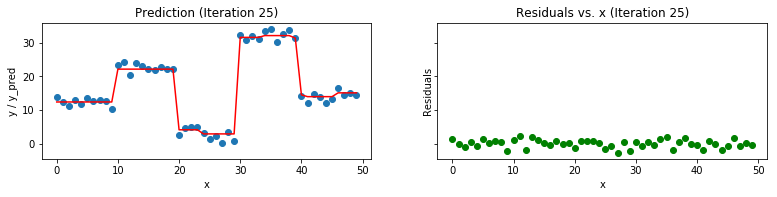

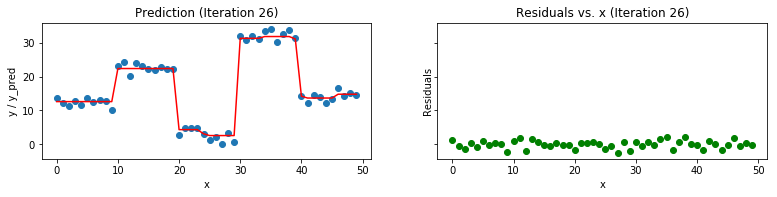

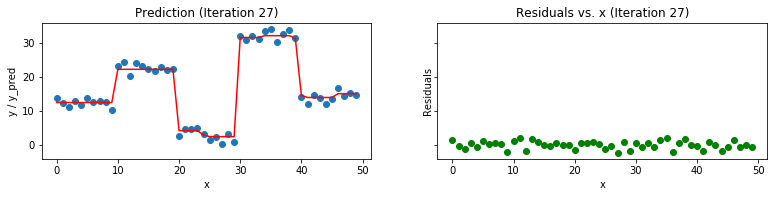

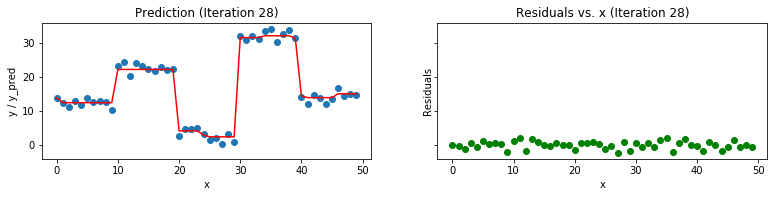

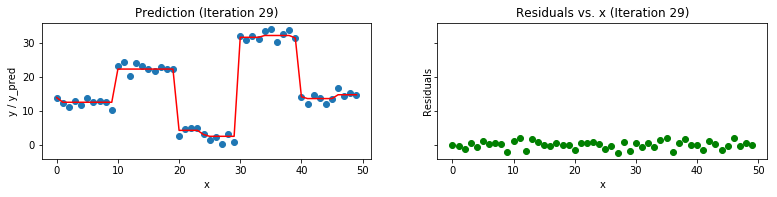

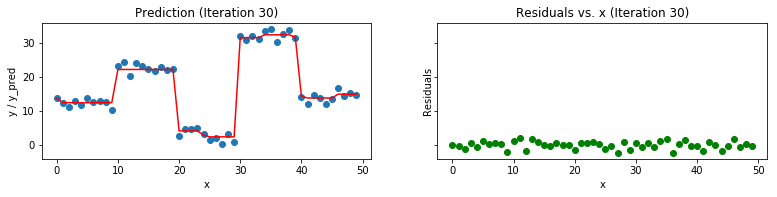

In [4]:
xi = x.values
yi = y.values
predf = 0
for i in range(30):
    
    clf = tree.DecisionTreeRegressor(max_depth=1)
    clf = clf.fit(xi, yi)
    predi = clf.predict(xi)
    predi = predi[:, None]
    #print("Iteration {} predi shape is {}".format(i, predi.shape))
    predf = predf + predi
    #print("Iteration {} predf shape is {}".format(i, predf.shape))
    
    ei = y.values - predf
    #print("Iteration {} ei shape is {}".format(i, predi.shape))
    
    yi = ei

    f, (ax1, ax2) = plt.subplots(1, 2, sharey=True, figsize = (13,2.5))

    ax1.plot(x, y, 'o')
    ax1.plot(x, predf, 'r')
    ax1.set_title(f'Prediction (Iteration {i+1})')
    ax1.set_xlabel('x')
    ax1.set_ylabel('y / y_pred')

    ax2.plot(x, ei, 'go')
    ax2.set_title(f'Residuals vs. x (Iteration {i+1})')
    ax2.set_xlabel('x')
    ax2.set_ylabel('Residuals')

## 参考资料
1.  https://medium.com/@cwchang/gradient-boosting-%E7%B0%A1%E4%BB%8B-f3a578ae7205 
2. https://www.kaggle.com/grroverpr/gradient-boosting-simplified/